## Replication for "Asymmetry by Design", March 22, 2020
### By Adam Goldstein and Charlie Eaton

### Appendix Figure A6: Estimated moderation effect of multi-brand status on (log) average campus student enrollment following law enforcement actions against parent firm (2-brand cutoff)

In [1]:
ssc install gr0070
ssc install lincomest
ssc install coefplot

In [2]:
copy "https://github.com/HigherEdData/asymmetry/raw/master/data/d_unitidasymmetry.dta" ///
    data/d_unitidasymmetry.dta, replace

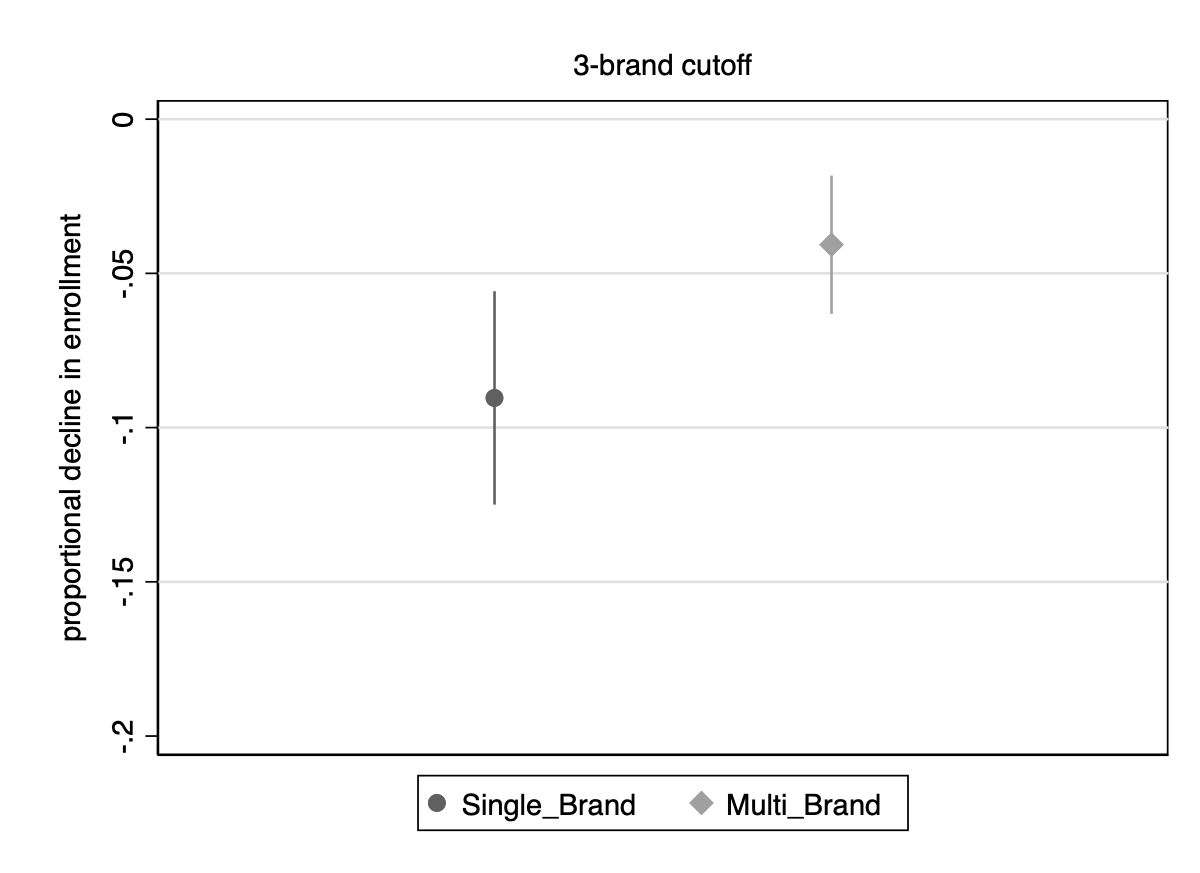

In [3]:
quietly {
quietly use data/d_unitidasymmetry, clear
est clear

sort unitid year
gen law_enforce= 1 if law_enf_frst_this_yr==1 
by unitid: carryforward law_enforce, replace
    
bys systemid year: egen Sys_law_enforce= min(law_enforce)
sort systemid year
by systemid: carryforward Sys_law_enforce, replace 
recode Sys_law_enforce .=0
    
label define multi_brand 0 "Single Brand Firm" 1 "Multi Brand Firm"
label val multi_brand multi_brand

    gen campus=1 if total_enrollment_log!=.
bysort systemid year: egen sys_campuses=total(campus)

gen interact = multi_brand * Sys_law_enforce

xi i.year i.iclevel
xtset unitid year

**Estimates Using Anderson-Hsaio first difference IV

xtivreg total_enrollment_log l.total_enrollment_log multi_brand Sys_law_enforce ///
    interact online selective sys_campuses _Iiclevel* dpcttype* _Iyear_*  ///
    (l.total_enrollment_log= l2.total_enrollment_log l3.total_enrollment_log ), ///
    fd vce(cluster unitid)
est store base
lincomest D1.Sys_law_enforce
est store Single_Brand
est restore base
lincomest D1.Sys_law_enforce + D1.interact
est store Multi_Brand
coefplot Single_Brand Multi_Brand, vertical ///
    title(3-brand cutoff, ///
    size(medsmall) margin(medsmall)) ylabel(-.2(.05)0, grid glcolor(gs14)) ///
    ytitle(proportional decline in enrollment, margin(medsmall)) ///
    xlabel(none, nolabels) xmtick(, noticks) scheme(s1mono) 

quietly graph export figures/fa6a_enroll_x_law_3multi.pdf, replace
}

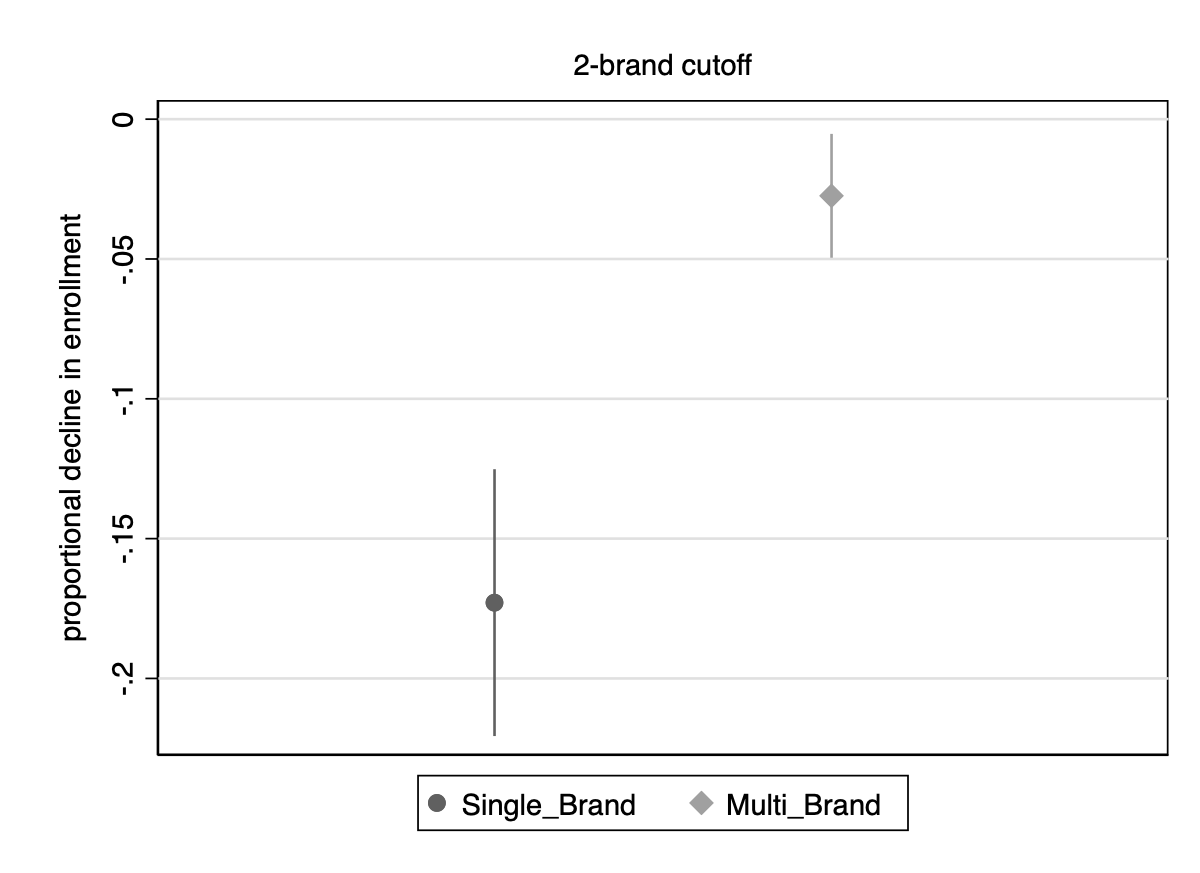

In [4]:
quietly {
quietly use data/d_unitidasymmetry, clear
est clear

replace multi_brand=multi_brand2
 
sort unitid year
gen law_enforce= 1 if law_enf_frst_this_yr==1 
by unitid: carryforward law_enforce, replace
    
bys systemid year: egen Sys_law_enforce= min(law_enforce)
sort systemid year
by systemid: carryforward Sys_law_enforce, replace 
recode Sys_law_enforce .=0
    
label define multi_brand 0 "Single Brand Firm" 1 "Multi Brand Firm"
label val multi_brand multi_brand

    gen campus=1 if total_enrollment_log!=.
bysort systemid year: egen sys_campuses=total(campus)

gen interact = multi_brand * Sys_law_enforce

xi i.year i.iclevel
xtset unitid year

**Estimates Using Anderson-Hsaio first difference IV

xtivreg total_enrollment_log l.total_enrollment_log multi_brand Sys_law_enforce ///
    interact online selective sys_campuses _Iiclevel* dpcttype* _Iyear_*  ///
    (l.total_enrollment_log= l2.total_enrollment_log l3.total_enrollment_log ), ///
    fd vce(cluster unitid)
est store base
lincomest D1.Sys_law_enforce
est store Single_Brand
est restore base
lincomest D1.Sys_law_enforce + D1.interact
est store Multi_Brand
coefplot Single_Brand Multi_Brand, vertical ///
    title(2-brand cutoff, ///
    size(medsmall) margin(medsmall)) ylabel(-.2(.05)0, grid glcolor(gs14)) ///
    ytitle(proportional decline in enrollment, margin(medsmall)) ///
    xlabel(none, nolabels) xmtick(, noticks) scheme(s1mono) 

quietly graph export figures/fa6b_enroll_x_law_2multi.pdf, replace
}

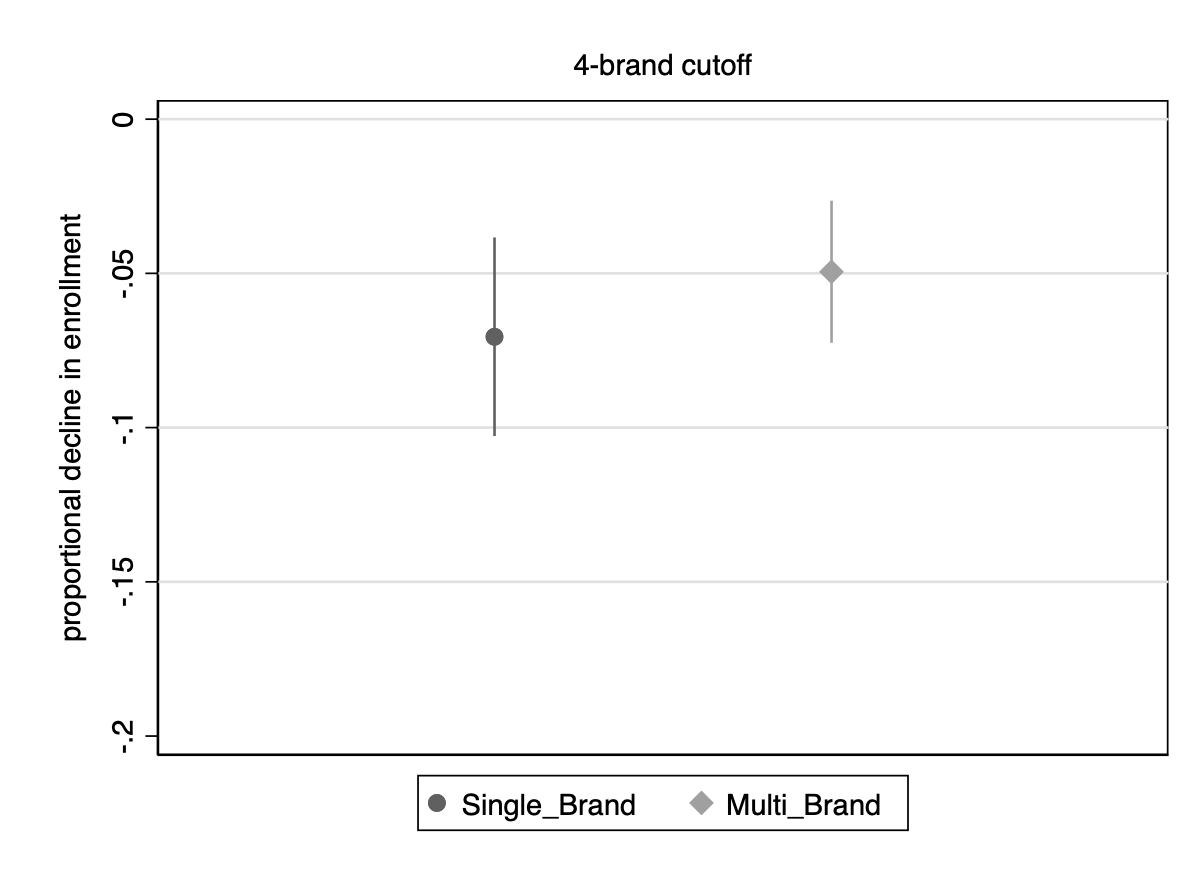

In [5]:
quietly {
quietly use data/d_unitidasymmetry, clear
est clear

replace multi_brand=multi_brand4
 
sort unitid year
gen law_enforce= 1 if law_enf_frst_this_yr==1 
by unitid: carryforward law_enforce, replace
    
bys systemid year: egen Sys_law_enforce= min(law_enforce)
sort systemid year
by systemid: carryforward Sys_law_enforce, replace 
recode Sys_law_enforce .=0
    
label define multi_brand 0 "Single Brand Firm" 1 "Multi Brand Firm"
label val multi_brand multi_brand

    gen campus=1 if total_enrollment_log!=.
bysort systemid year: egen sys_campuses=total(campus)

gen interact = multi_brand * Sys_law_enforce

xi i.year i.iclevel
xtset unitid year

**Estimates Using Anderson-Hsaio first difference IV

xtivreg total_enrollment_log l.total_enrollment_log multi_brand Sys_law_enforce ///
    interact online selective sys_campuses _Iiclevel* dpcttype* _Iyear_*  ///
    (l.total_enrollment_log= l2.total_enrollment_log l3.total_enrollment_log ), ///
    fd vce(cluster unitid)
est store base
lincomest D1.Sys_law_enforce
est store Single_Brand
est restore base
lincomest D1.Sys_law_enforce + D1.interact
est store Multi_Brand
coefplot Single_Brand Multi_Brand, vertical ///
    title(4-brand cutoff, ///
    size(medsmall) margin(medsmall)) ylabel(-.2(.05)0, grid glcolor(gs14)) ytitle(proportional decline in enrollment, margin(medsmall)) xlabel(none, nolabels) xmtick(, noticks) scheme(s1mono) 

quietly graph export figures/fa6c_enroll_x_law_4multi.pdf, replace
}